In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
train = pd.read_csv('./datasets/Santander Customer Satisfaction/train.csv')
test = pd.read_csv('./datasets/Santander Customer Satisfaction/test.csv')

print(train.shape)
print(test.shape)

(76020, 371)
(75818, 370)


In [4]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
for col in train.columns:
    chart = 'column_null: {}' .format(train[col].isnull().sum())
    if chart != "column_null: 0":
        print(chart)

In [7]:
from sklearn.model_selection import train_test_split

features = train.iloc[:,:-1]
target = train[["TARGET"]]

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    stratify=target,
                                                    random_state=0)
print(X_train.shape, X_test.shape)

(68418, 370) (7602, 370)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(68418, 74)


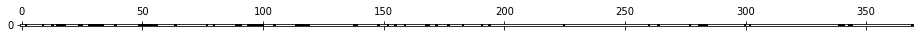

In [9]:
from sklearn.feature_selection import SelectPercentile, f_classif
import numpy as np
import matplotlib.pyplot as plt

select = SelectPercentile(percentile=20)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print(X_train_selected.shape)

X_test_selected = select.transform(X_test)

mask = select.get_support()
plt.matshow( mask.reshape(1, -1), cmap='gray_r' )
plt.yticks([0])
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train_selected, y_train)
model_lr.score(X_test_selected, y_test)

/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9604051565377533

In [11]:
from xgboost import XGBClassifier

model_xg = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=0)
evals = [(X_test, y_test)]
model_xg.fit(X_train, y_train, 
          eval_set=evals, 
          eval_metric='logloss', 
          early_stopping_rounds=50)

print( model_xg.score(X_train, y_train), model_xg.score(X_test, y_test) )

/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.61181
[1]	validation_0-logloss:0.54528
[2]	validation_0-logloss:0.48992
[3]	validation_0-logloss:0.44339
[4]	validation_0-logloss:0.40389
[5]	validation_0-logloss:0.37009
[6]	validation_0-logloss:0.34102
[7]	validation_0-logloss:0.31591
[8]	validation_0-logloss:0.29411
[9]	validation_0-logloss:0.27518
[10]	validation_0-logloss:0.25866
[11]	validation_0-logloss:0.24425
[12]	validation_0-logloss:0.23164
[13]	validation_0-logloss:0.22060
[14]	validation_0-logloss:0.21083
[15]	validation_0-logloss:0.20227
[16]	validation_0-logloss:0.19475
[17]	validation_0-logloss:0.18819
[18]	validation_0-logloss:0.18233
[19]	validation_0-logloss:0.17722
[20]	validation_0-logloss:0.17277
[21]	validation_0-logloss:0.16881
[22]	validation_0-logloss:0.16534
[23]	validation_0-logloss:0.16228
[24]	validation_0-logloss:0.15961
[25]	validation_0-logloss:0.15725
[26]	validation_0-logloss:0.15516
[27]	validation_0-logloss:0.15336
[28]	validation_0-logloss:0.15175
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

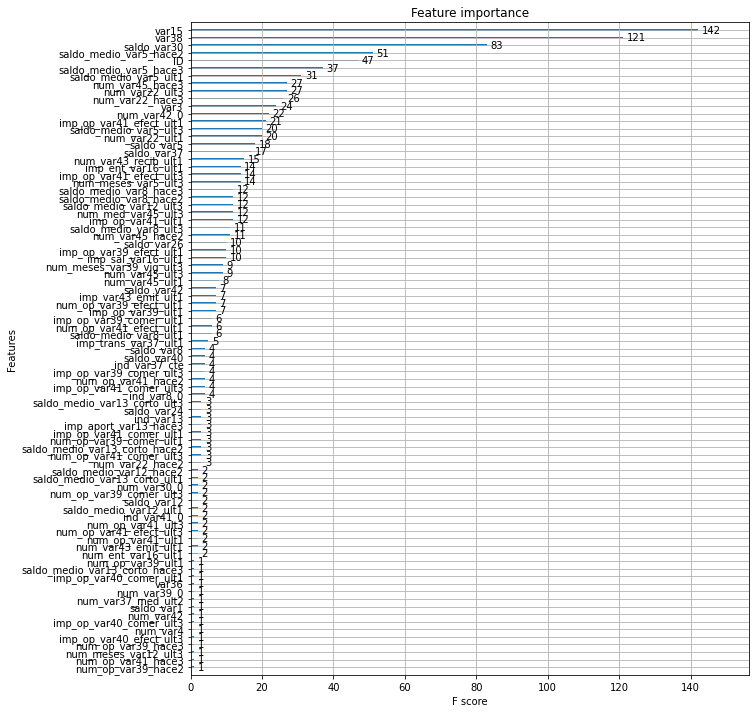

In [12]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots( figsize=(10,12) )
plot_importance(model_xg, ax=ax)

In [13]:
from lightgbm import LGBMClassifier

# 모델 학습
model_lg = LGBMClassifier(random_state=0, max_depth=1, learning_rate=0.2, n_estimators=100)
model_lg.fit(X_train, y_train)
print( model_lg.score(X_train, y_train), model_lg.score(X_test, y_test) )

/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9604782367213306 0.9602736122073139


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

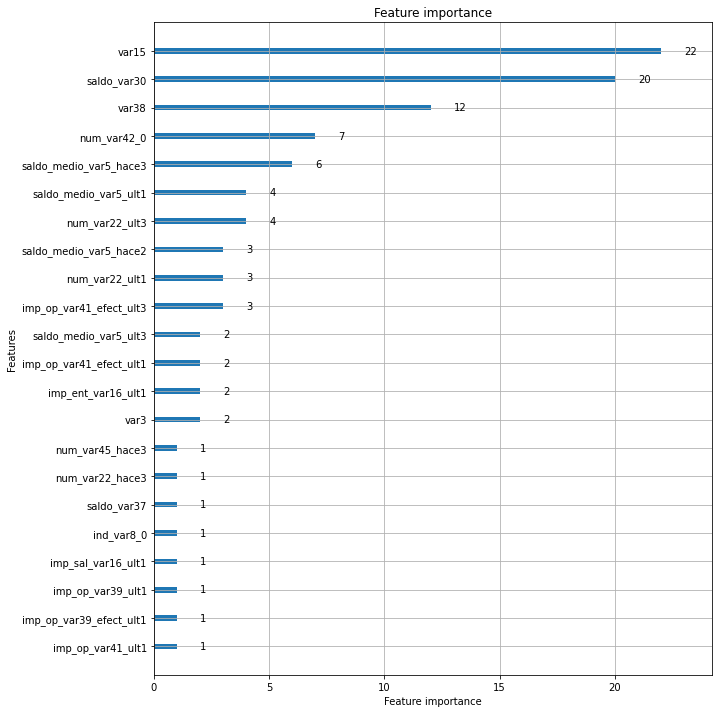

In [14]:
import matplotlib.pyplot as plt
from lightgbm import plot_importance

fig, ax = plt.subplots( figsize=(10,12) )
plot_importance(model_lg, ax=ax)

In [15]:
from sklearn.metrics import confusion_matrix

pred_xg = model_xg.predict(X_test)
confusion_matrix(y_test, pred_xg)

array([[7299,    2],
       [ 301,    0]])

In [16]:
from sklearn.metrics import confusion_matrix

pred_lg = model_lg.predict(X_test)
confusion_matrix(y_test, pred_lg)

array([[7300,    1],
       [ 301,    0]])

In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_xg), f1_score(y_test, pred_lg)

(0.0, 0.0)

In [18]:
from sklearn.metrics import classification_report

print( classification_report(y_test, pred_xg, target_names=['1','0']) )

              precision    recall  f1-score   support

           1       0.96      1.00      0.98      7301
           0       0.00      0.00      0.00       301

    accuracy                           0.96      7602
   macro avg       0.48      0.50      0.49      7602
weighted avg       0.92      0.96      0.94      7602



In [19]:
print( classification_report(y_test, pred_lg, target_names=['1','0']) )

              precision    recall  f1-score   support

           1       0.96      1.00      0.98      7301
           0       0.00      0.00      0.00       301

    accuracy                           0.96      7602
   macro avg       0.48      0.50      0.49      7602
weighted avg       0.92      0.96      0.94      7602



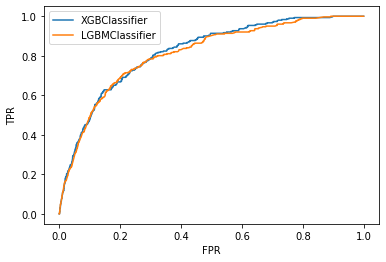

In [20]:
from sklearn.metrics import roc_curve

fpr_xg, tpr_xg, th_xg = roc_curve(y_test, model_xg.predict_proba(X_test)[:, 1])
fpr_lg, tpr_lg, th_lg = roc_curve(y_test, model_lg.predict_proba(X_test)[:, 1])

plt.plot(fpr_xg, tpr_xg, label='XGBClassifier')
plt.plot(fpr_lg, tpr_lg, label='LGBMClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

xg_auc = roc_auc_score(y_test, model_xg.predict_proba(X_test)[:, 1])
lg_auc = roc_auc_score(y_test, model_lg.predict_proba(X_test)[:, 1])
xg_auc, lg_auc

(0.8197074901221832, 0.8105420410711499)

# 그리디 분석

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True)

features = train.iloc[:,:-1]
target = train[["TARGET"]]

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    stratify=target,
                                                    random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search.fit(X_train_scaled, y_train)

print(grid_search.score(X_test_scaled, y_test))

print(grid_search.best_score_, grid_search.best_params_)

/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sydney/.virtualenvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 